#Importando bibliotecas e loading dos dados

In [82]:
!pip install tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [83]:
df = pd.read_csv('DF_amostra_02.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277078 entries, 0 to 277077
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      277078 non-null  float64
 1   x1      277078 non-null  float64
 2   x2      277078 non-null  float64
 3   x3      277078 non-null  float64
 4   x4      277078 non-null  float64
 5   x5      277078 non-null  float64
 6   x6      277078 non-null  float64
 7   x7      277078 non-null  float64
 8   x8      277078 non-null  float64
 9   x9      277078 non-null  float64
 10  x10     277078 non-null  float64
 11  x11     277078 non-null  float64
 12  x12     277078 non-null  float64
 13  x13     277078 non-null  float64
 14  x14     277078 non-null  float64
 15  x15     277078 non-null  float64
 16  x16     277078 non-null  float64
 17  x17     277078 non-null  float64
 18  x18     277078 non-null  float64
 19  x19     277078 non-null  float64
 20  x20     277078 non-null  float64
 21  x21     27

#Separando e dividindo os dados

In [85]:
# 2. Separar os dados entre variáveis de entrada (X) e variável alvo (y)
X = df.drop('y', axis=1)  # Remove a coluna 'y' que é a variável alvo
y = df['y']  # Variável alvo

# 3. Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

#MLP

In [ ]:
# 5. Construir o modelo MLP
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))  # Primeira camada oculta com 300 neurônios
model.add(Dropout(0.5))  # 50% dos neurônios serão desativados durante o treino
model.add(Dense(128, activation='relu'))  # Segunda camada oculta com 100 neurônios
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # Segunda camada oculta com 100 neurônios
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # Segunda camada oculta com 100 neurônios
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Camada de saída com 1 neurônio (saída binária)

# 6. Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#earling stop
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 7. Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.6358 - loss: 0.6378 - val_accuracy: 0.6752 - val_loss: 0.6025
Epoch 2/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.6687 - loss: 0.6097 - val_accuracy: 0.6765 - val_loss: 0.5936
Epoch 3/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6734 - loss: 0.6023 - val_accuracy: 0.6876 - val_loss: 0.5826
Epoch 4/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6825 - loss: 0.5960 - val_accuracy: 0.6866 - val_loss: 0.5800
Epoch 5/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6873 - loss: 0.5917 - val_accuracy: 0.6995 - val_loss: 0.5751
Epoch 6/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.6889 - loss: 0.5892 - val_accuracy: 0.7043 - val_loss: 0.5705
Epoch 7/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6914 - loss: 0.5866 - val_accuracy: 0.7071 - val_loss: 0.5663
Epoch 8/50
5542/5542 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.6941 - loss: 0

#Métricas de desempenho

In [80]:
# 8. Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype('int32')  # Previsões
accuracy = accuracy_score(y_test, y_pred)  # Acurácia

print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

1732/1732 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Acurácia no conjunto de teste: 0.7479


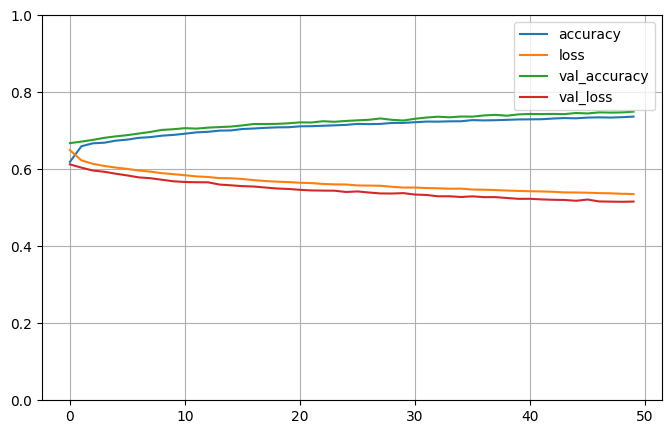

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()